<a href="https://colab.research.google.com/github/lipchenko/machine_learning_lipchenko/blob/main/my_visuals_hw_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое задание

## ЗАДАНИЕ 1: Базовые графики matplotlib

/tmp/ipython-input-3160827552.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


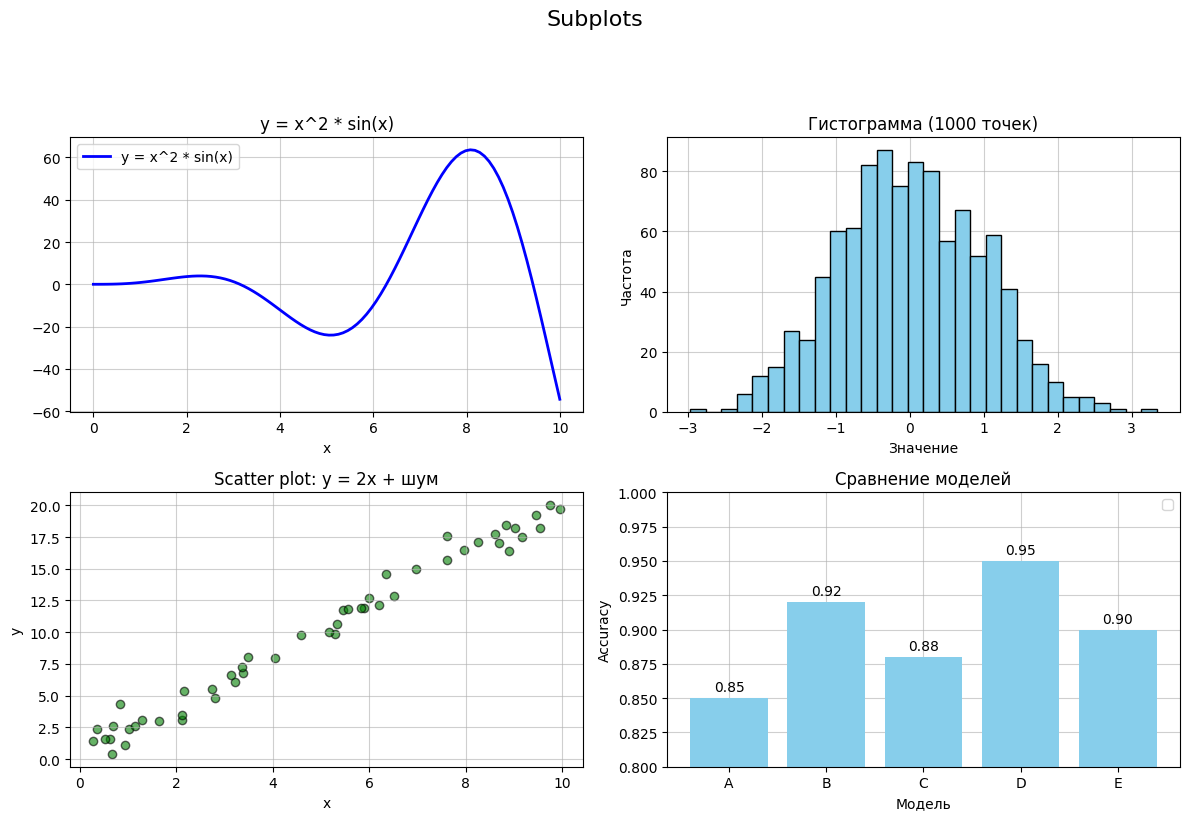

In [1]:
# Создайте фигуру с 4 subplots (2x2):
# 1. Линейный график функции y = x^2 * sin(x) на интервале [0, 10]
#    Добавьте заголовок, подписи осей, сетку, легенду
# 2. Гистограмма 1000 случайных точек из нормального распределения
#    Настройте количество bins=30, добавьте заголовок
# 3. Scatter plot: 50 точек (x - равномерное распределение, y = 2x + шум)
#    Настройте размер точек, прозрачность, цвет
# 4. Bar chart: сравнение 5 разных моделей по точности
#    accuracy = [0.85, 0.92, 0.88, 0.95, 0.90]
#    Добавьте значения над столбцами

import numpy as np
import matplotlib.pyplot as plt

# Создаем фигуру с 4 subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 строки, 2 столбца
fig.suptitle('Subplots', fontsize=16, y=1.02)

# 1. Линейный график y = x^2 * sin(x)
ax = axes[0, 0]
x = np.linspace(0, 10, 100)
y = x**2 * np.sin(x)
ax.plot(x, y, 'b-', label='y = x^2 * sin(x)', linewidth=2)
ax.set_title('y = x^2 * sin(x)')
ax.set_xlabel('x')
ax.legend()
ax.grid(True, alpha=0.6)

# 2. Гистограмма нормального распределения
ax = axes[0, 1]
data = np.random.normal(0, 1, 1000)
ax.hist(data, bins=30, alpha=1.0, color='skyblue',
        edgecolor='black')
ax.set_xlabel('Значение')
ax.set_ylabel('Частота')
ax.set_title('Гистограмма (1000 точек)')
ax.grid(True, alpha=0.6)
ax.set_axisbelow(True)


# 3. Scatter plot: y = 2x + шум
ax = axes[1, 0]
x = np.random.uniform(0, 10, 50)
y = 2 * x + np.random.normal(0, 1, 50)
ax.scatter(x, y, alpha=0.6, color='green',
           edgecolors='black', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter plot: y = 2x + шум')
ax.grid(True, alpha=0.6)


# 4. Bar chart: точность моделей
ax = axes[1, 1]
ax.set_ylim(0.8, 1.0)
models = ['A', 'B', 'C', 'D', 'E']
accuracy = [0.85, 0.92, 0.88, 0.95, 0.90]
bars = ax.bar(models, accuracy, color='skyblue', alpha=1.0)
ax.set_xlabel('Модель')
ax.set_ylabel('Accuracy')
ax.set_title('Сравнение моделей')
# Добавила значения над столбцами
for bar, acc in zip(bars, accuracy):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{acc:.2f}', ha='center')
ax.legend()
ax.grid(True, alpha=0.6)
ax.set_axisbelow(True)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## ЗАДАНИЕ 2: Seaborn визуализации

/tmp/ipython-input-3775848355.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


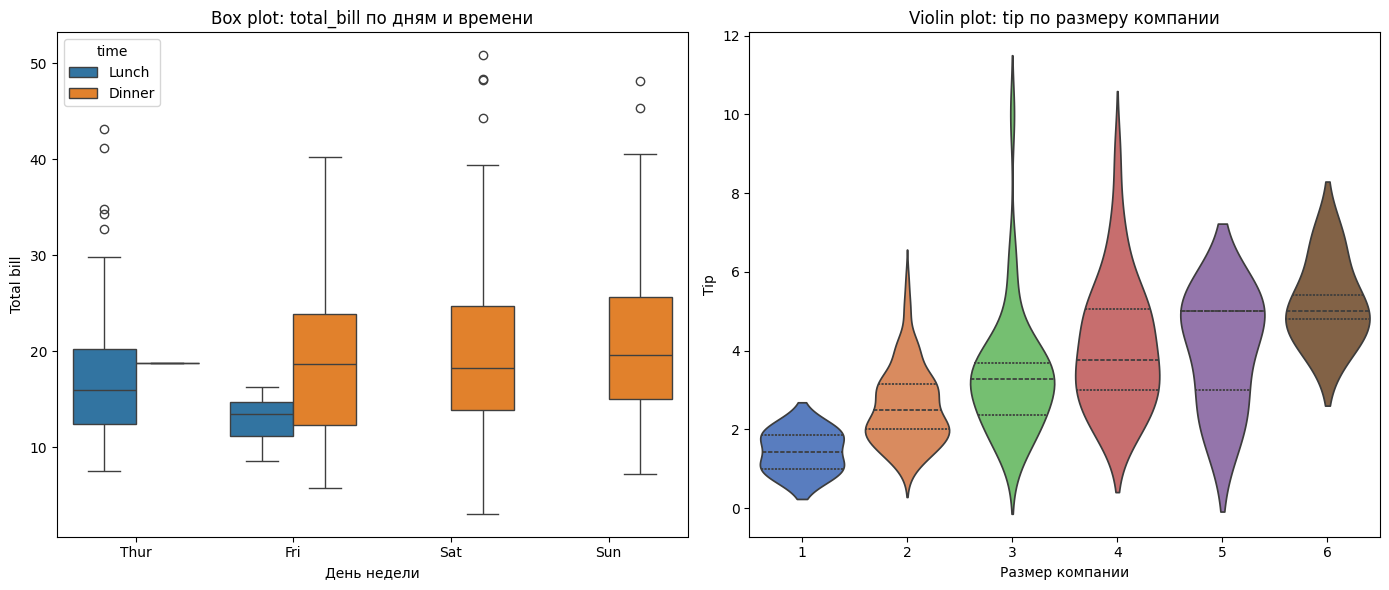

<Figure size 640x480 with 0 Axes>

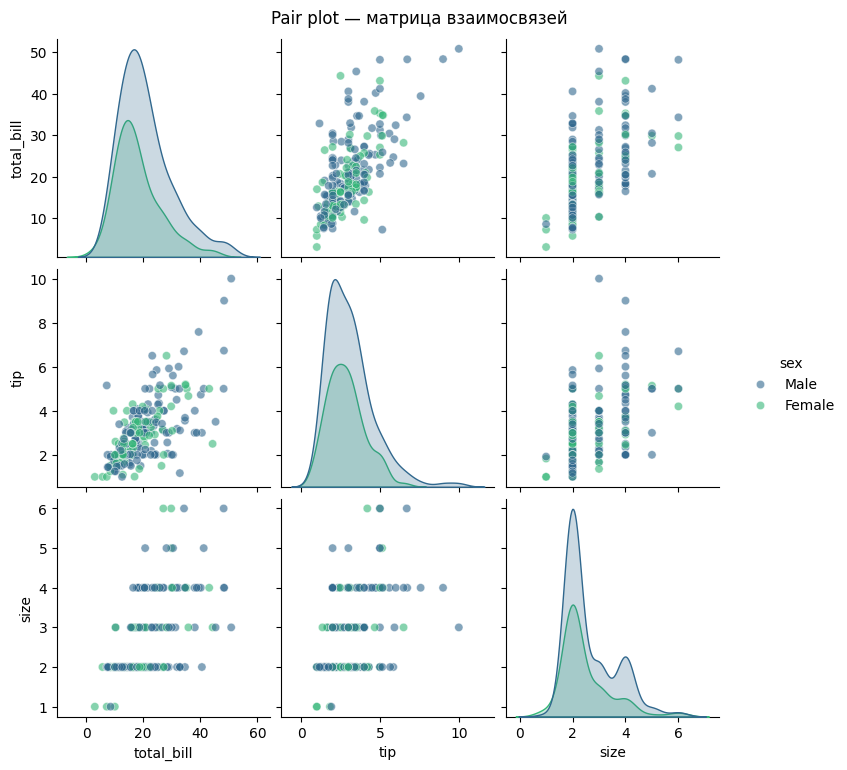

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем датасет
tips = sns.load_dataset('tips')

# Создаем фигуру с 2 графиками (Box plot и Violin plot)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Box plot: total_bill по дням с разделением по времени
sns.boxplot(
    data=tips,
    x='day',
    y='total_bill',
    hue='time',
    ax=axes[0]
)
axes[0].set_title('Box plot: total_bill по дням и времени')
axes[0].set_xlabel('День недели')
axes[0].set_ylabel('Total bill')
#добавила координаты для графиков,т.к. графики распределялись не как в примере


# 2. Violin plot: tip по размеру компании
sns.violinplot(
    data=tips,
    x='size',
    y='tip',
    palette='muted',
    inner='quartile',
    ax=axes[1]
)
axes[1].set_title('Violin plot: tip по размеру компании')
axes[1].set_xlabel('Размер компании')
axes[1].set_ylabel('Tip')

plt.tight_layout()
plt.show()

# 3. Pair plot: выберем 4 числовых признака и раскрасим по полу
#Создала отдельную фигуру
plt.figure()
sns.pairplot(
    tips[['total_bill', 'tip', 'size', 'sex']],
    hue='sex',
    palette='viridis',
    plot_kws={'alpha': 0.6},
    diag_kind='kde',
)

plt.suptitle('Pair plot — матрица взаимосвязей', y=1.02)
plt.show()

